# Lab 1: OpenCV Recap & Image Histograms

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-Image-using-OpenCV" data-toc-modified-id="Read-Image-using-OpenCV-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read Image using OpenCV</a></span></li><li><span><a href="#Get-Image-Shape-(h,-w,-no-of-channels)" data-toc-modified-id="Get-Image-Shape-(h,-w,-no-of-channels)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Get Image Shape (h, w, no of channels)</a></span></li><li><span><a href="#Get-Image-Data-type" data-toc-modified-id="Get-Image-Data-type-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Get Image Data type</a></span></li><li><span><a href="#Show-Image-using-cv2" data-toc-modified-id="Show-Image-using-cv2-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Show Image using cv2</a></span></li><li><span><a href="#Show-Image-using-matplot" data-toc-modified-id="Show-Image-using-matplot-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Show Image using matplot</a></span></li><li><span><a href="#Calculate-the-Histogram-of-the-image" data-toc-modified-id="Calculate-the-Histogram-of-the-image-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Calculate the Histogram of the image</a></span><ul class="toc-item"><li><span><a href="#Compute-Histograms" data-toc-modified-id="Compute-Histograms-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Compute Histograms</a></span></li><li><span><a href="#Normalize-Histograms" data-toc-modified-id="Normalize-Histograms-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Normalize Histograms</a></span></li><li><span><a href="#Flatten-Histograms" data-toc-modified-id="Flatten-Histograms-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Flatten Histograms</a></span></li><li><span><a href="#Concatenate-Histograms" data-toc-modified-id="Concatenate-Histograms-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Concatenate Histograms</a></span></li></ul></li><li><span><a href="#Compare-2-images-using-their-Histogrms-feature-vectors" data-toc-modified-id="Compare-2-images-using-their-Histogrms-feature-vectors-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Compare 2 images using their Histogrms feature vectors</a></span></li></ul></div>

## Read Image using OpenCV

In [1]:
import cv2

In [2]:
img1 = cv2.imread('image_3.jpg') # Replace this with your image path

## Get Image Shape (h, w, no of channels)

In [3]:
print(f'Image height {img1.shape[0]}\nImage width {img1.shape[1]}\nImage channels {img1.shape[2]}')

Image height 3456
Image width 5184
Image channels 3


## Get Image Data type

In [4]:
print(type(img1))

<class 'numpy.ndarray'>


## Show Image using cv2

In [5]:
cv2.imshow('Image 1', img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Show Image using matplot

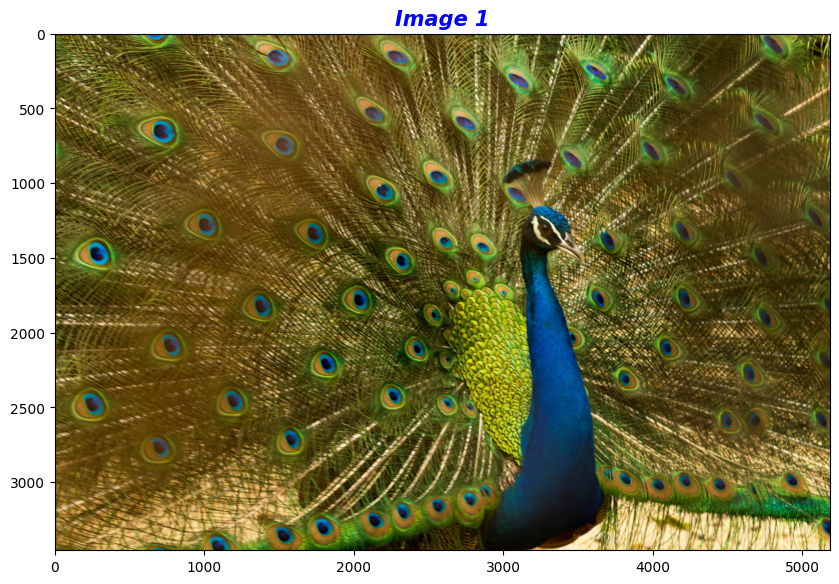

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.title('Image 1', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': 'blue', 'fontstyle': 'italic'})
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
# plt.imshow(img1)
plt.show()

## Calculate the Histogram of the image


<b> Steps to Extract a Feature Vector Using Histogram:</b>
1. Compute Histograms: Use cv2.calcHist to compute the histogram for each color channel if the image is in color. You can adjust the number of bins to control the size of the feature vector.

2. Normalize Histograms: Divide each histogram by the total number of pixels to normalize it, ensuring values are on a comparable scale.

3. Flatten Histogrmas

3. Concatenate Histograms: For colored images, combine the histograms of each channel into a single feature vector.

You now have a feature vector representing your image!

### Compute Histograms

In [7]:
# Parameters:
# [img1] - Input image, placed in square brackets as calcHist expects a list of images
# [0] - Index of the channel to calculate histogram for (0 for blue, 1 for green, 2 for red)
# None - No mask is used; consider the entire image
# [256] - Number of bins in the histogram
# [0, 256] - Range of pixel intensity values (0 to 255)
hist_b = cv2.calcHist([img1], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([img1], [1], None, [256], [0, 256])
hist_r = cv2.calcHist([img1], [2], None, [256], [0, 256])

In [8]:
hist_b.shape # notice!!! it's has to be flatten to be a vector

(256, 1)

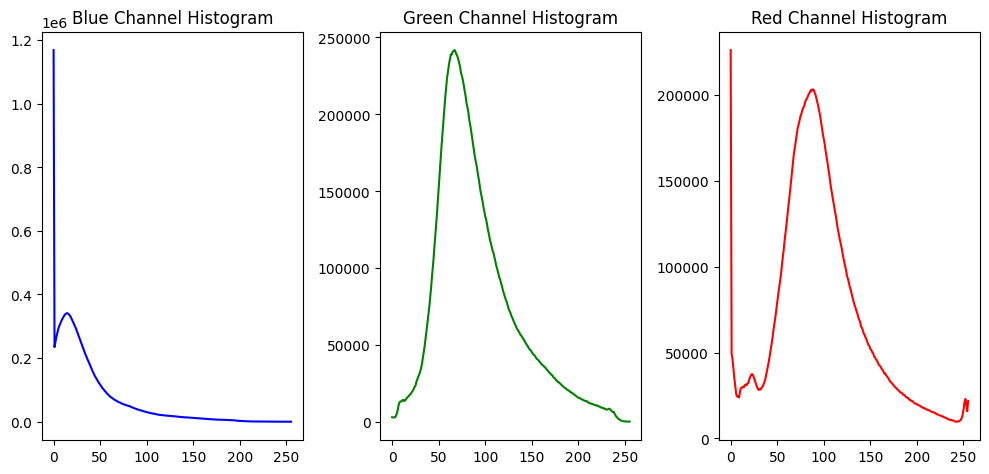

In [9]:
plt.figure(figsize=(10,5))

# Parameters of subplot:
# 1st - Number of rows in the subplot grid
# 2nd  - Number of columns in the subplot grid
# 3rd - Index of the current subplot

plt.subplot(1, 3, 1)
plt.plot(hist_b, color='blue')
plt.title('Blue Channel Histogram')

plt.subplot(1, 3, 2)
plt.plot(hist_g, color='green')
plt.title('Green Channel Histogram')

plt.subplot(1, 3, 3)
plt.plot(hist_r, color='red')
plt.title('Red Channel Histogram')


plt.tight_layout()
plt.show()

### Normalize Histograms

In [10]:
#Normalize by the number of pixels
total_pixels = img1.shape[0] * img1.shape[1]
hist_r /= total_pixels
hist_g /= total_pixels
hist_b /= total_pixels

### Flatten Histograms

In [11]:
hist_r = hist_r.flatten()
hist_g = hist_g.flatten()
hist_b = hist_b.flatten()

### Concatenate Histograms

In [12]:
import numpy as np
feature_vect_1 = np.concatenate([hist_b, hist_g, hist_r])

In [13]:
feature_vect_1.shape

(768,)

In [14]:
feature_vect_1

array([6.52272999e-02, 1.30935619e-02, 1.40630919e-02, 1.48935271e-02,
       1.56090362e-02, 1.62371937e-02, 1.67583507e-02, 1.71648618e-02,
       1.75268296e-02, 1.79290976e-02, 1.82026532e-02, 1.84887126e-02,
       1.87783986e-02, 1.89088415e-02, 1.90385040e-02, 1.90375540e-02,
       1.89180523e-02, 1.87028237e-02, 1.85118206e-02, 1.81783177e-02,
       1.78254470e-02, 1.74690597e-02, 1.70920771e-02, 1.67427771e-02,
       1.63573660e-02, 1.59111153e-02, 1.54549833e-02, 1.50246955e-02,
       1.45706292e-02, 1.40917813e-02, 1.36997830e-02, 1.32302558e-02,
       1.28171034e-02, 1.23599684e-02, 1.18926736e-02, 1.15257930e-02,
       1.11047700e-02, 1.07087540e-02, 1.03654275e-02, 9.96974576e-03,
       9.57931019e-03, 9.17520002e-03, 8.82634800e-03, 8.50116182e-03,
       8.10949877e-03, 7.84771983e-03, 7.55306566e-03, 7.25461589e-03,
       6.98223198e-03, 6.74266834e-03, 6.51622145e-03, 6.25461061e-03,
       6.02286123e-03, 5.78692555e-03, 5.62907662e-03, 5.37740113e-03,
      

## Compare 2 images using their Histogrms feature vectors

In [16]:
import cv2
from scipy.spatial.distance import cosine

img3 = cv2.imread('lenna.png') # Replace it with your image path


hist_b = cv2.calcHist([img3], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([img3], [1], None, [256], [0, 256])
hist_r = cv2.calcHist([img3], [2], None, [256], [0, 256])

total_pixels = img3.shape[0] * img3.shape[1]
hist_b /= total_pixels
hist_g /= total_pixels
hist_r /= total_pixels

hist_b = hist_b.flatten()
hist_g = hist_g.flatten()
hist_r = hist_r.flatten()

feature_vect_2 = np.concatenate([hist_b, hist_g, hist_r])
feature_vect_2.shape

euclidean_distance = np.linalg.norm(feature_vect_1 - feature_vect_2)
print("Euclidean Distance:", euclidean_distance)

manhattan_distance = np.sum(np.abs(feature_vect_1 - feature_vect_2))
print("Manhattan Distance:", manhattan_distance)

cosine_distance = cosine(feature_vect_1, feature_vect_2)
print("Cosine Similarity:", 1-cosine_distance)

Euclidean Distance: 0.1783277
Manhattan Distance: 3.3375993
Cosine Similarity: 0.40267891632165087
